# Final Project - Data Bootcamp
# Economic Inequality and STEM Education in North Carolina 

#### Author: Pooja Vittal
#### Email: [pv630@stern.nyu.edu](pv630@stern.nyu.edu) 

In the United States, there are increasing disparities in education due to income levels. Increasingly, [richer students are attending college](https://www.nytimes.com/2015/09/23/business/economy/education-gap-between-rich-and-poor-is-growing-wider.html?_r=0), a basic prerequisite for most jobs nowadays, and poorer students are getting left behind. Since public schools are financed primarily through property taxes, those that can pay higher taxes also get better public schools while poorer families have to send their children to public schools with limited resources, novice teachers, and worse outcomes. 

With these trends in mind and a desire to make an impact, I've been accepted to, and will be joining the 2018 Teach for America Corps post-graduation. I will be teaching High School Math in Eastern North Carolina, a primarily rural area with suffering public education. Last year alone, there were around 200 teacher vacancies in this particular region, which sits east of the North Carolina Research Triangle. Since I'll be teaching a STEM subject for 2 years in a state I know very little about (since I grew up in upstate New York), I decided to center my project on learning more about the state, and seeinng how the previously mentioned trends look across North Carolina. 

This project uses data from the Census and the North Carolina State Board of Education to examine the trends. End of course scores for Math 1 are used as a proxy for STEM Education because the most data is available for this score. Math 1 is typically taken by 9th grade students, and it is very likely that I will be teaching Math 1 next fall. 

It should be noted that trends could differ for science scores or math scores across different grades. 

This project will look at these issues across these steps:
    1. I will describe the data and their sources;
    2. I will discuss the packages I'm using to analyze the data;
    3. I will import the data, clean the datasets, and merge them;
    4. I will analyze across the math scores and household income;
    6. And finally, I will give my final conclusions based on my analysis. 

### Data Report 

The main data elements in this project come from the [Census](https://census.gov/data/developers/data-sets.html) and the [North Carolina State Department of Education, Department of Public Instruction](http://www.ncpublicschools.org/src/guide/performance/). 

Access to both data sets is free, and available via API though an API key is needed to access the Census data (which is free to request). While the Census has a lot of data on economic indicators, I will only be pulling in the population, mean household income, and number of unemployed people for each county. 

The data from the NC State Board of Education is available via [Open Data Durham](https://opendurham.nc.gov/explore/dataset/north-carolina-school-performance-data/information/), and it looks at test scores on standardized test scores given to every student (end of course / end of grade assessments), and gives the percentage of students who are at grade level, and the percentage of students who are career and college ready for each assessment and school. Within this dataset, I will be focusing on:
- Each school, for which I have assigned a FIPS Code based on its county;
- The Standards for Performance - There are two possibilities: Career and College Ready and Grade Level. Almost every school has two rows, one for each standard; 
- For each standard, data is given on the percent of students in the school who meet this particular level for any particular test. Though this is further broken down based on other demographic data, I will be focusing on the aggregate student percentage. This student percentage taken with the standard will be the **main variable in analysis**. 

** Data Disclaimer:** Though the North Carolina Education data can be accessed via API, I will be pulling it directly from an excel file on my hard drive because I had to construct the FIPS Codes for each school myself so that I could merge the datasets together.  

### My Packages

In my analysis, I will be using the following packages: 

- Pandas - This will be the main tool I use to merge, analyze, and manipulate data;
- Display - This will be used to display the data in a nicer, more professional manner;
- Matplotlib.pyplot - This will be used to plot data points in graphs to visualize it better;
- Numpy - This will be used to do mathematical operations on the data;
- Statsmodels - This will be used for statistical analysis;

In [153]:
from IPython.display import display, Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

### Import Data - Part 1 - Import Census

First, I will pull in the Census data from the API. The Census collecs a lot of data on households, but I'm most concerned with data on population, household income, and unemployment within each county. Furthermore, I'm most concerned with only data from North Carolina, which is why I'll only be calling data from North Carolina. 

In [154]:
from census import Census
from us import states

my_api_key = '4bf48fe422f0c5c495cb582eac0fef84fb3f2c2f'
# This is my api_key

c = Census(my_api_key)

In [155]:
code = ("NAME","B19013_001E", "B23025_001E", "B23025_005E") 

# Geographic Name, household income, total employment status, unemployed 

county_2015 = pd.DataFrame(c.acs5.get(code, 
                                         {'for': 'county:*'}, year=2015))
                                        

county_2015[county_2015["NAME"].str.contains("North Carolina")].head()

# only want to look at data from North Carolina 

,B19013_001E,B23025_001E,B23025_005E,NAME,county,state
1890,41814.0,123563.0,6077.0,"Alamance County, North Carolina",001,37
1891,39365.0,30308.0,1602.0,"Alexander County, North Carolina",003,37
1892,36968.0,9149.0,513.0,"Alleghany County, North Carolina",005,37
1893,33228.0,21269.0,2109.0,"Anson County, North Carolina",007,37
1894,36267.0,22660.0,1091.0,"Ashe County, North Carolina",009,37


Now that I've pulled in the appropriate data, I want to create two new columns: one for the FIPS Code and one for the unemployment rate. I also want to clean up the data set so that the columns have better labels and I'll have an easier time merging the data with my other dataset. 

In [156]:
county_2015["FIPS Code"] = county_2015["state"] + county_2015["county"]

county_2015["Unemployment Rate"] = county_2015["B23025_005E"] / county_2015["B23025_001E"]

### unemployment rate = # of unemployed / population x 100


In [157]:
county_2015["FIPS Code"]= county_2015["FIPS Code"].astype(float)

county_2015.columns = ["Household Income", "Population", "Unemployed", "Name", "County", 
                      "State", "FIPS Code", "Unemployment Rate"]

nc_county_2015 = county_2015[county_2015["Name"].str.contains("North Carolina")]

nc_county_2015.head()


,Household Income,Population,Unemployed,Name,County,State,FIPS Code,Unemployment Rate
1890,41814.0,123563.0,6077.0,"Alamance County, North Carolina",001,37,37001.0,0.049181
1891,39365.0,30308.0,1602.0,"Alexander County, North Carolina",003,37,37003.0,0.052857
1892,36968.0,9149.0,513.0,"Alleghany County, North Carolina",005,37,37005.0,0.056072
1893,33228.0,21269.0,2109.0,"Anson County, North Carolina",007,37,37007.0,0.099158
1894,36267.0,22660.0,1091.0,"Ashe County, North Carolina",009,37,37009.0,0.048147


### Import Data - Part 2 - Import NC Education Data

Next, I will pull in the data from the North Carolina State Department of Education. This dataset includes every single public school in North Carolina along with the District, different subjects, standard, and the percentage of students reaching these standards across different demographics. For the purposes of this project, I'm only concerned with the percentage of all students and the "EOC NC Math 1" (End of Course NC Math 1 Test Score) Subject. 

As mentioned above, this dataset does exist on an API, but I had to construct the FIPS Codes myself for each school so I will be pulling in this data from an excel spreadsheet saved in my hard drive. 


In [158]:
path = '/Users/poojavittal/Documents/Data Bootcamp/north-carolina-school-performance-data.xls'

edu = pd.read_excel(path)

edu[edu["Subject"].str.contains("EOC NC Math 1")].head()

,FIPS Code,District Name,School Code,School Name,SBE District,Subject,"Standard (CCR - Level 4 & 5, GLP - Level 3 & Above)",Percentage of: All Students,Percentage of: Female,Percentage of: Male,...,Number of: American Indian,Number of: Asian,Number of: Black,Number of: Hispanic,Number of: Two or More Races,Number of: White,Number of: EDS,Number of: LEP,Number of: SWD,Number of: AIG
15,37001,Alamance-Burlington Schools,010353,Hawfields Middle,Piedmont Triad,EOC NC Math 1,College and Career Ready,>95,>95,>95,...,<10,<10,<10,<10,<10,41,<10,<10,<10,35
109,37001,Alamance-Burlington Schools,010394,Turrentine Middle,Piedmont Triad,EOC NC Math 1,Grade Level Proficient,>95,>95,>95,...,<10,<10,11,19,<10,24,22,<10,<10,49
125,37001,Alamance-Burlington Schools,010406,Woodlawn Middle,Piedmont Triad,EOC NC Math 1,College and Career Ready,>95,>95,>95,...,<10,<10,<10,<10,<10,40,12,<10,<10,39
175,37001,Alamance-Burlington Schools,010310,Broadview Middle,Piedmont Triad,EOC NC Math 1,College and Career Ready,88.5,76.9,>95,...,<10,<10,<10,13,<10,<10,14,<10,<10,18
192,37001,Alamance-Burlington Schools,010324,Eastern Alamance High,Piedmont Triad,EOC NC Math 1,Grade Level Proficient,63.9,71.7,57.8,...,<10,<10,72,50,16,188,130,13,37,63


Now that I've pulled in my data, I will clean it and splice the parts I want. I will first remove the unneeded columns. Then, I will rename the columns so that they are easier to call during analysis. Finally, I will remove nonnumerical values from the "Student Percent" column so that I can accurately plot these values. 

In [159]:
math_nc = edu[edu.columns[0:8]]

# strip unneeded columns 

math_nc.columns = ["FIPS Code", "District", "School Code", "School Name", "SBE District", "Subject", "Standard", "Student Percent"]

# rename columns to make it easier to call

In [160]:
math_nc["Student Percent"] = math_nc["Student Percent"].astype(str)

math_nc["Student Percent"] = math_nc["Student Percent"].str.replace(">","")

math_nc["Student Percent"] = math_nc["Student Percent"].str.replace("<","")

math_nc["Student Percent"] = math_nc["Student Percent"].astype(float)

/Users/poojavittal/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/poojavittal/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/poojavittal/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [161]:
math_nc = math_nc[math_nc["Subject"].str.contains("EOC NC Math 1")]

math_nc.head()

,FIPS Code,District,School Code,School Name,SBE District,Subject,Standard,Student Percent
15,37001,Alamance-Burlington Schools,010353,Hawfields Middle,Piedmont Triad,EOC NC Math 1,College and Career Ready,95.0
109,37001,Alamance-Burlington Schools,010394,Turrentine Middle,Piedmont Triad,EOC NC Math 1,Grade Level Proficient,95.0
125,37001,Alamance-Burlington Schools,010406,Woodlawn Middle,Piedmont Triad,EOC NC Math 1,College and Career Ready,95.0
175,37001,Alamance-Burlington Schools,010310,Broadview Middle,Piedmont Triad,EOC NC Math 1,College and Career Ready,88.5
192,37001,Alamance-Burlington Schools,010324,Eastern Alamance High,Piedmont Triad,EOC NC Math 1,Grade Level Proficient,63.9


### Part 4 Merging 

Now that I've imported both datasets, I need to merge them so that I can actually analyze the data properly. 

To do this, I will merge the data with the "FIPS Code" column since this is common in both. I've already made sure that both are the same type so that this merge will work. 

This is a many-to-one merge since there are multiple schools for each FIPS code so this merge will be done on the inner column. 

In [162]:
county_combo = pd.merge(nc_county_2015, math_nc,
                       how = "inner",
                       on = "FIPS Code",
                       indicator = True)

county_combo.head()

,Household Income,Population,Unemployed,Name,County,State,FIPS Code,Unemployment Rate,District,School Code,School Name,SBE District,Subject,Standard,Student Percent,_merge
0,41814.0,123563.0,6077.0,"Alamance County, North Carolina",001,37,37001,0.049181,Alamance-Burlington Schools,010353,Hawfields Middle,Piedmont Triad,EOC NC Math 1,College and Career Ready,95.0,both
1,41814.0,123563.0,6077.0,"Alamance County, North Carolina",001,37,37001,0.049181,Alamance-Burlington Schools,010394,Turrentine Middle,Piedmont Triad,EOC NC Math 1,Grade Level Proficient,95.0,both
2,41814.0,123563.0,6077.0,"Alamance County, North Carolina",001,37,37001,0.049181,Alamance-Burlington Schools,010406,Woodlawn Middle,Piedmont Triad,EOC NC Math 1,College and Career Ready,95.0,both
3,41814.0,123563.0,6077.0,"Alamance County, North Carolina",001,37,37001,0.049181,Alamance-Burlington Schools,010310,Broadview Middle,Piedmont Triad,EOC NC Math 1,College and Career Ready,88.5,both
4,41814.0,123563.0,6077.0,"Alamance County, North Carolina",001,37,37001,0.049181,Alamance-Burlington Schools,010324,Eastern Alamance High,Piedmont Triad,EOC NC Math 1,Grade Level Proficient,63.9,both


### Plotting / Analysis 

Now that the data is finally all set up and ready, I will analyze it. 

The tricky part with this data in terms of the educational data is that the educational data exists across two categories. For each school, there are 2 rows - "Career and College Ready" and "Grade Level", and then there is a percentage of students meeting each level. For example, if NYU were in this dataset, x% of students would be at grade level and y% would be College and Career Ready. 

To get around this, I will be segmenting the data further by creating one dataframe for the College and Career Ready standard and one dataframe for those at Grade Level. I do understand that this could be done more seamlessly through multi-layered groupbys and unstacking, but doing it this way created much cleaner datasets that were easier to work with. An example of what the pivot table dataframe looks like is below. 

In [163]:
county_combo.pivot_table(index = "School Name", columns = "Standard", 
                         values = ("Student Percent", "Household Income"),
                         aggfunc=np.mean).head(10)


Household Income  \
Standard                                 College and Career Ready   
School Name                                                         
A G Cox Middle                                            41119.0   
A L Brown High                                            44376.0   
A L Stanback Middle                                       59290.0   
Acme Delco Middle                                         34949.0   
Alamance-Burlington Middle/Early College                  41814.0   
Alamance-Burlington Schools                               41814.0   
Albemarle Road Middle                                     56854.0   
Alexander Central High                                    39365.0   
Alexander County Schools                                  39365.0   
Alexander Early College                                   39365.0   

                                                                 \
Standard                                 Grade Level Proficient   
School Name                                                       
A G Cox Middle                                          41119.0   
A L Brown High                                          44376.0   
A L Stanback Middle                                     59290.0   
Acme Delco Middle                                       34949.0   
Alamance-Burlington Middle/Early College                41814.0   
Alamance-Burlington Schools                             41814.0   
Albemarle Road Middle                                   56854.0   
Alexander Central High                                  39365.0   
Alexander County Schools                                39365.0   
Alexander Early College                                 39365.0   

                                                  Student Percent  \
Standard                                 College and Career Ready   
School Name                                                         
A G Cox Middle                                               88.4   
A L Brown High                                               19.9   
A L Stanback Middle                                          95.0   
Acme Delco Middle                                            50.0   
Alamance-Burlington Middle/Early College                     95.0   
Alamance-Burlington Schools                                  50.6   
Albemarle Road Middle                                        95.0   
Alexander Central High                                       41.6   
Alexander County Schools                                     52.2   
Alexander Early College                                      71.9   

                                                                 
Standard                                 Grade Level Proficient  
School Name                                                      
A G Cox Middle                                             95.0  
A L Brown High                                             28.3  
A L Stanback Middle                                        95.0  
Acme Delco Middle                                          80.0  
Alamance-Burlington Middle/Early College                   95.0  
Alamance-Burlington Schools                                60.9  
Albemarle Road Middle                                      95.0  
Alexander Central High                                     54.1  
Alexander County Schools                                   62.7  
Alexander Early College                                    80.7

While the dataset looks very clean, it's hard to work with in terms of plotting the data, which is why I will create two distinct dataframes for gradelevel and collegeready. I will be working with these datasets moving forward. 

In [164]:
collegeready = county_combo[county_combo["Standard"].str.contains("College and Career Ready")]

gradelevel = county_combo[county_combo["Standard"].str.contains("Grade Level Proficient")]


Now, I will do my first analysis by school. I will create two scatter plot of each school in terms of the household income in its area, and the percent of students at either grade level or college ready. This scatterplot is created using matplotlib.pyplot. Since they are quite wide, it's difficult to get them side by side without sacrificing the data.  

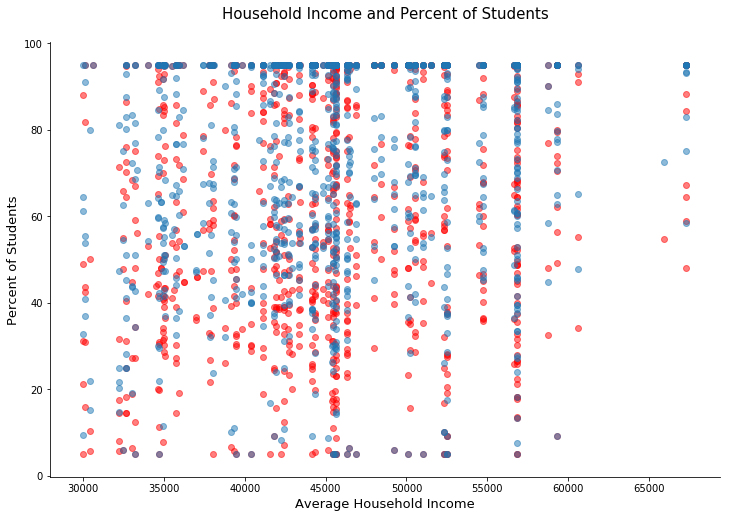

In [167]:
fig, ax = plt.subplots(figsize = (12,8))


ax.scatter(collegeready["Household Income"], collegeready["Student Percent"],  alpha = .50, color = "r")

ax.set_title("Household Income and Percent of College Ready Students\n", fontsize = 15)
ax.set_ylabel("Percent of College Ready Students", fontsize = 13)
ax.set_xlabel("Average Household Income", fontsize = 13)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)



ax.scatter(gradelevel["Household Income"], gradelevel["Student Percent"],  alpha = .50)

ax.set_title("Household Income and Percent of Students\n", fontsize = 15)
ax.set_ylabel("Percent of Students", fontsize = 13)
ax.set_xlabel("Average Household Income", fontsize = 13)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)


plt.show()

Before analyzing this, some things of note:
- The red dots are for the "Career and College Ready" standard 
- The blue dots are for the grade level standard

**This initial analysis doesn't seem to show any conclusive trends**, with the schools looking fairly well distributed across household income. However, these dots are plotted similarily, which tells me that a more macro look at the data may be more conclusive than this one. 

Therefore, I will first look at the data descriptions for both college ready and grade level, and then I will next group the data into quintiles by income level, then look at the mean percentage of students meeting grade level and mean percentage of college ready students at each quintile. 

In order to accomplish this, I will be again using the gradelevel and collegeready datasets again. I will then create income quintiles, then group the mean Student Percent in each standard by income quintile. Then, I will concat these two grouped datasets into one dataframe so that I can create a bar graph comparing the mean student percents in each income level for each standard. 

In [122]:
college_describe = pd.concat([collegeready["Household Income"].describe(), 
                              collegeready["Student Percent"].describe()], axis = 1)

display(college_describe)

,Household Income,Student Percent
count,957.000000,957.000000
mean,45514.423197,62.634169
std,7530.754262,28.086588
min,30027.000000,5.000000
25%,41119.000000,40.000000
50%,45378.000000,64.100000
75%,50512.000000,92.900000
max,67309.000000,95.000000


An interesting point to note here are that the range of student percent at college ready level is very wide from 5 to 95. This could perhaps indicate a lack of complete data across certain counties. 

In [168]:
grade_describe = pd.concat([gradelevel["Household Income"].describe(), 
                            gradelevel["Student Percent"].describe()], axis = 1)

display(grade_describe)

,Household Income,Student Percent
count,957.000000,957.000000
mean,45497.978056,71.148694
std,7522.668214,25.006173
min,30027.000000,5.000000
25%,41119.000000,53.300000
50%,45378.000000,77.100000
75%,50512.000000,95.000000
max,67309.000000,95.000000


As like before, the range is still quite wide, though the mean is higher for students at grade level, indicating that the average student is at least at grade level across these schools. 

Now, on to the more interesting analysis over income quintiles.

In [170]:
nquintiles = 5 #number of sections - 5 for quintiles

labels = ["quintile " + str(var) for var in range (1, nquintiles + 1)]

# For Grade Level Standard dataset

income_q = pd.qcut(gradelevel["Household Income"],
                  nquintiles,
                  labels = labels)

grouped = gradelevel.groupby(income_q)

grade_quint = grouped["Student Percent"].mean()

print(grade_quint)

Household Income
quintile 1    65.173958
quintile 2    71.642408
quintile 3    71.146117
quintile 4    74.701075
quintile 5    73.306044
Name: Student Percent, dtype: float64


In [171]:
# for college ready standard data set 

income_q2 = pd.qcut(collegeready["Household Income"],
                   nquintiles,
                   labels = labels)

grouped = collegeready.groupby(income_q2)

college_quint = grouped["Student Percent"].mean()

print(college_quint)

Household Income
quintile 1    54.988021
quintile 2    62.217801
quintile 3    62.394146
quintile 4    67.530645
quintile 5    66.383060
Name: Student Percent, dtype: float64


In [172]:
# Now I will combine the college ready and grade level ready datasets into one dataframe that can be plotted

quint_combo = pd.concat([grade_quint,college_quint], axis = 1)

quint_combo.columns = ["% Students at Grade Level by Income Quintile", 
                       "% Students College Ready by Income Quintiles"]

quint_combo


,% Students at Grade Level by Income Quintile,% Students College Ready by Income Quintiles
Household Income,,
quintile 1,65.173958,54.988021
quintile 2,71.642408,62.217801
quintile 3,71.146117,62.394146
quintile 4,74.701075,67.530645
quintile 5,73.306044,66.383060


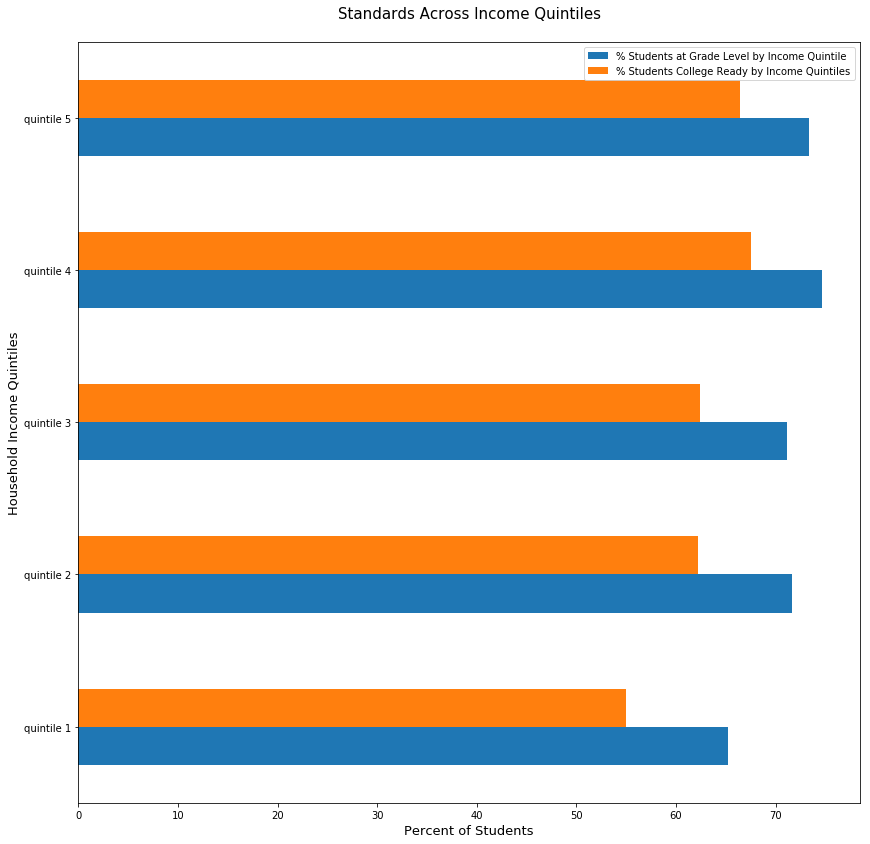

In [174]:
fig, ax = plt.subplots()

quint_combo.plot(kind = 'barh', ax = ax, figsize =(14,14))

ax.set_title("Standards Across Income Quintiles\n", fontsize = 15)
ax.set_ylabel("Household Income Quintiles", fontsize = 13)
ax.set_xlabel("Percent of Students", fontsize = 13)

# make a bar graph plotting percent of students at grade level/college ready for each income quintile

plt.show()

Now this is more interesting because there are some clear trends, especially among college ready students. The percent of students at college ready level clearly increases as the income quintiles increase, indicating that richer students do in fact do better in school. The same trend exists across the grade level standard, but there seems to be less variation. 

Now, I will look at this in an even more aggregated fashion by looking at the correlation between Household Income and Student Percent across each Standard across FIPS codes i.e. counties. I will do this by grouping the data by FIPS code, then further grouping it by both income and student percent. Then, I will plot this and do some statistical analysis. When doing this analysis, I will also weigh the dots by population to see rural/urban trends. 

In [177]:
grouped3 = gradelevel.groupby("FIPS Code")

county_grade_income = grouped3["Household Income"].mean()

county_grade_percent = grouped3["Student Percent"].mean()


In [178]:
grouped4 = collegeready.groupby("FIPS Code")

county_college_income = grouped4["Household Income"].mean()

county_college_percent = grouped4["Student Percent"].mean()

In [179]:
# Combine the grouped income and percent into one dataframe to plot

county_macro = pd.concat([county_grade_income, county_grade_percent], axis = 1)

#Weight the dots by population to see urban/rural trends

size = .01*grouped3["Population"].mean()

county_macro.columns = ["income", "student_percent"]

county_macro.head()

,income,student_percent
FIPS Code,,
37001.0,41814.0,70.705263
37003.0,39365.0,77.500000
37005.0,36968.0,47.300000
37007.0,33228.0,49.433333
37009.0,36267.0,53.000000


In [180]:
results = smf.ols('''income ~ student_percent''',
                data = county_macro).fit()


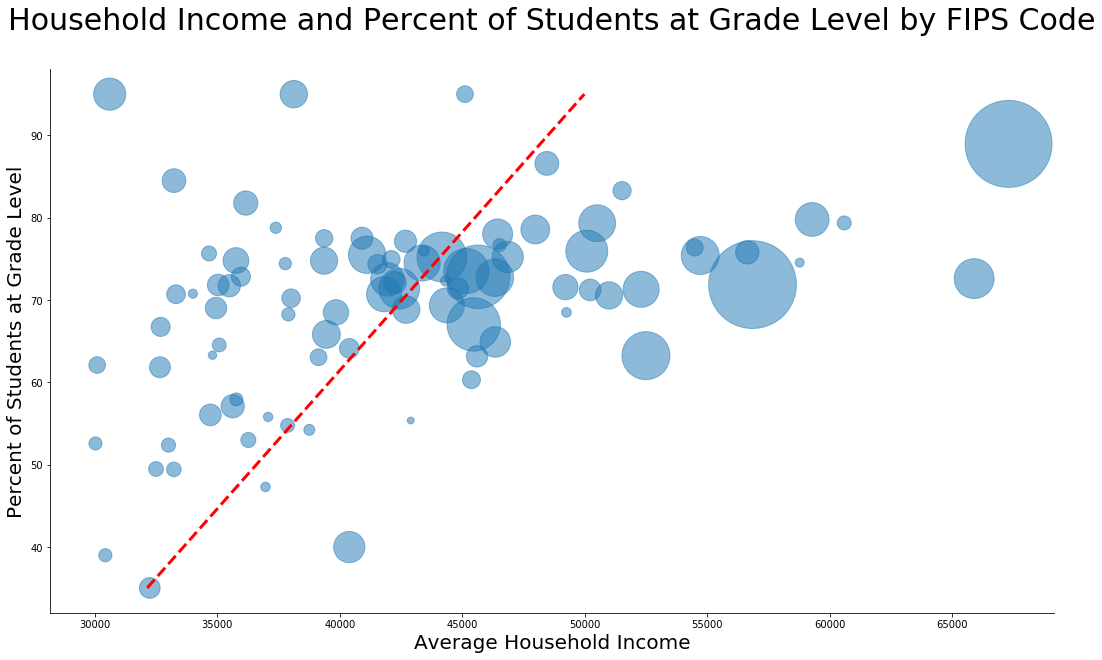

In [181]:
fig, ax = plt.subplots(figsize = (18,10))

ax.scatter(county_macro["income"], county_macro["student_percent"],  s = size, alpha = .5)

ax.set_title("Household Income and Percent of Students at Grade Level by FIPS Code\n", fontsize = 30)
ax.set_ylabel("Percent of Students at Grade Level", fontsize = 20)
ax.set_xlabel("Average Household Income", fontsize = 20)

### Best fit line

pred = results.predict(exog = county_macro["student_percent"].sort_values())
ax.plot(pred, county_macro["student_percent"].sort_values(),
       color = 'r', linewidth = 3.0, linestyle = "dashed", 
       label = "Best Fit Line")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()

It looks like there is some correlation, though a relatively weak one between income and grade level. 

However, it is clear that more urban areas tend to both be richer and do better on the STEM tests, which is an interesting insight. 

The statistical summary below will give more background. 

In [182]:
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     18.37
Date:                Thu, 21 Dec 2017   Prob (F-statistic):           4.65e-05
Time:                        23:44:21   Log-Likelihood:                -929.18
No. Observations:                  90   AIC:                             1862.
Df Residuals:                      88   BIC:                             1867.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.171e+04   4889.865      4.440      0.000     1.2e+04    3.14e+04
student_percent   297.6090     69.445      4.286      0.000     159.601     435.617
==============================================================================
Omnibus:                        5.811   Durbin-Watson:                   2.295
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                5.116
Skew:                           0.515   Prob(JB):                       0.0774
Kurtosis:                       3.550   Cond. No.                         438.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As suspected, there is a very weak correlation, with only 17% of the variation explained. 

I will look at the college ready data in the same manner, but the regression will most likely look similar. 

In [183]:
# Combine the grouped income and percent into one dataframe to plot

county_macro2 = pd.concat([county_college_income, county_college_percent], axis = 1)

#Weight the dots by population to see urban/rural trends

size = .01*grouped4["Population"].mean()

county_macro2.columns = ["income", "student_percent"]

county_macro2.head()

,income,student_percent
FIPS Code,,
37001.0,41814.0,64.842105
37003.0,39365.0,71.140000
37005.0,36968.0,36.400000
37007.0,33228.0,33.700000
37009.0,36267.0,44.700000


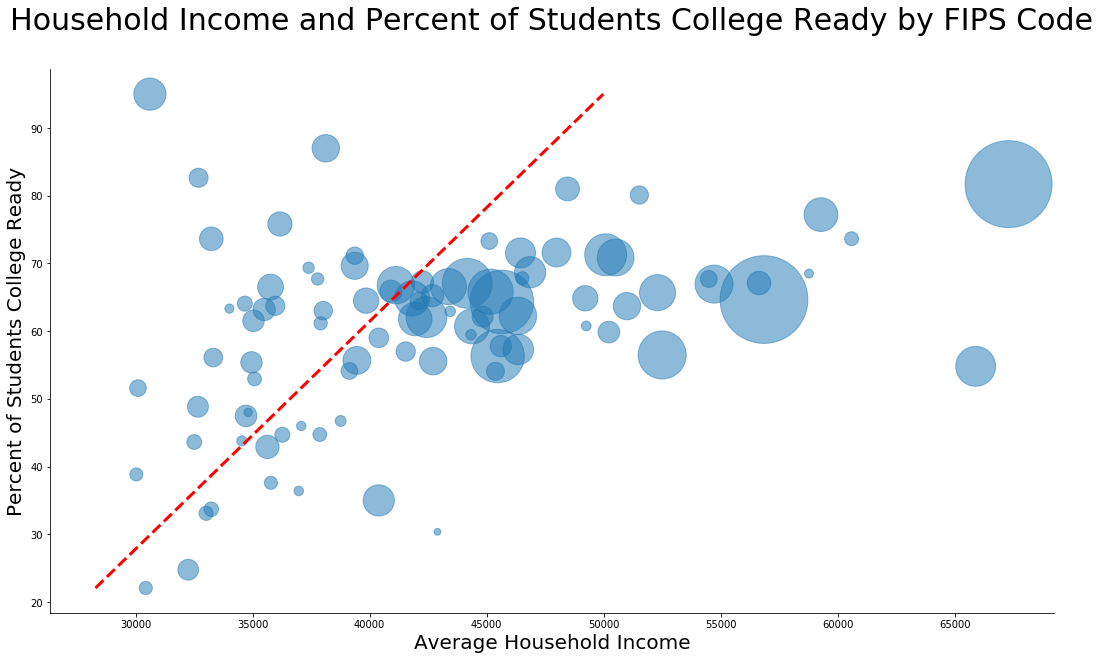

In [184]:
results2 = smf.ols('''income ~ student_percent''',
                data = county_macro2).fit()

fig, ax = plt.subplots(figsize = (18,10))

ax.scatter(county_macro2["income"], county_macro2["student_percent"],  s = size, alpha = .5)

ax.set_title("Household Income and Percent of Students College Ready by FIPS Code\n", fontsize = 30)
ax.set_ylabel("Percent of Students College Ready", fontsize = 20)
ax.set_xlabel("Average Household Income", fontsize = 20)

### Best fit line

pred = results.predict(exog = county_macro2["student_percent"].sort_values())
ax.plot(pred, county_macro2["student_percent"].sort_values(),
       color = 'r', linewidth = 3.0, linestyle = "dashed", 
       label = "Best Fit Line")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()


In [185]:
display(results2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     18.18
Date:                Thu, 21 Dec 2017   Prob (F-statistic):           5.00e-05
Time:                        23:54:16   Log-Likelihood:                -939.63
No. Observations:                  91   AIC:                             1883.
Df Residuals:                      89   BIC:                             1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.729e+04   3607.906      7.565      0.000    2.01e+04    3.45e+04
student_percent   249.6290     58.552      4.263      0.000     133.287     365.971
==============================================================================
Omnibus:                        8.238   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.781
Skew:                           0.526   Prob(JB):                       0.0124
Kurtosis:                       4.100   Cond. No.                         284.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Again, there is a very weak, if any, correlation. This will be discussed further in the next section. 

### Summary

The results of my analysis did not seem to support my overall hypothesis as well as I would have liked. There were very weak correlations between household income and student at different standards for the Math 1 exam. 

There could be multiple reasons for this:
- The math exam may not be a good proxy for educational inequity within STEM Education. Perhaps it's fairly easy or perhaps inequities occur more frequently in other exams;
- Household income may not be a good proxy for economic inequity. Perhaps looking more at factors such as educational attainment in total would be more helpful;
- Inequities may be more clear cut across different demographics i.e. race;
- Inequities may occur at an even more micro level within counties themselves. I know that in the region I'll be teaching, this is true with some counties having both excellent and dire public schools. 

Another helpful way to look at the data would have been to map out the scores and household income across North Carolina. However, I could not get geopandas to work on either of my laptops due to various issues having to do with importing geopandas and fiona. However, if I were to be able to map out the data, I would merge the geopandas dataset (after adding '37' to the FIPS code), then use matplotlib to plot the household income in one section, and student standard in another. I think this would tell a clearer story about both rural vs. urban income levels and the variation across counties in terms of income/education. 

It is clear that more needs to be done for me to prepare for the next steps, so I will continue to analyze data and look for better data sources. 